In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


In [52]:
f1 = 5
f2 = 10
Fs = 1000
A = 2

t = np.linspace(0,1-1/Fs,Fs)
y1 = A * np.sin(2*np.pi*f1*t)
y2 = A * np.sin(2*np.pi*f2*t)

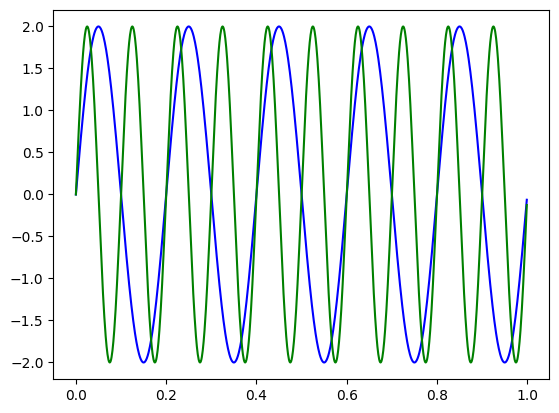

In [53]:
plt.plot(t,y1, color='blue')
plt.plot(t,y2, color='green')
plt.show()

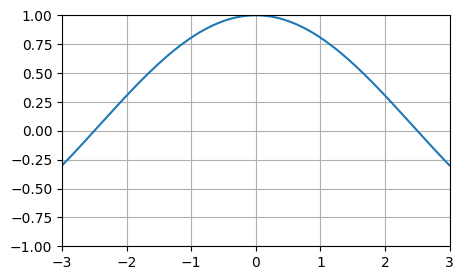

In [3]:
# @title gausspulse
x_fixed = np.linspace(-3,3,200)

def animate(i):
  ax.cla()

  x = np.linspace(-3,3,200) - i/10
  F = signal.gausspulse(x, fc = .1, bw = 0.3, retquad=False, retenv=True)[0]

  ax.plot(x_fixed, F)

  ax.set(xlim = (-3,3), ylim = (-1,1))
  ax.grid()

fig, ax = plt.subplots(figsize=(5,3))


anim = FuncAnimation(fig, animate, interval=1000, frames=1000, repeat=False)
anim.save('gaussianPulse.mp4', writer = 'ffmpeg', fps = 30)

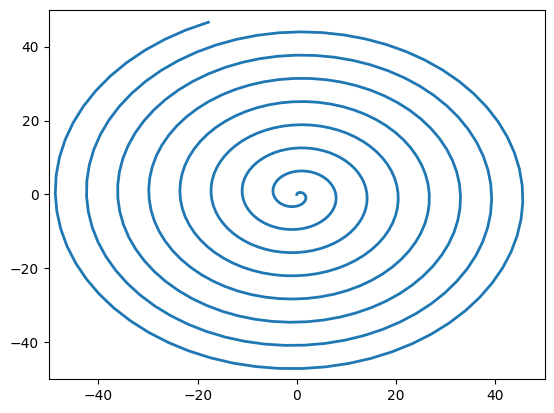

In [107]:
# @title coil
fig = plt.figure()
axis = plt.axes(xlim = (-50, 50),
                ylim = (-50, 50))

#line, = axis.plot([i for i in np.linspace(-20,20,100)], [a**2 for a in np.linspace(-2,2,100)], lw=2)
line, = axis.plot([], [], lw=2)

def init():
  line.set_data([],[])
  return line,

xdata, ydata = [], []

def animate(i):
  t = 0.1 * i

  x = t * np.sin(t)
  y = t * np.cos(t)

  xdata.append(x)
  ydata.append(y)
  line.set_data(xdata, ydata)

  return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=500, interval=20, blit=True)
anim.save('/content/drive/MyDrive/Python animations/growingCoil.mp4', writer = 'ffmpeg', fps = 30)

In [ ]:
f = 10
A = 2
Fs = 1000

def animate(i):
  ax.cla()

  t = np.linspace(-10,10,i) # the i value (thus the t value) is changing with every frame
  y = np.sin(2*np.pi*f*t)

  ax.plot(t, y)
  ax.set(xlim=(-20,20), ylim=(-5,5))
  ax.grid()

fig, ax = plt.subplots(figsize=(5,3))


anim = FuncAnimation(fig, animate, interval=1000, frames=Fs, repeat=False)
anim.save('/content/drive/MyDrive/Python animations/sineWave2.mp4', writer = 'ffmpeg', fps = 30)

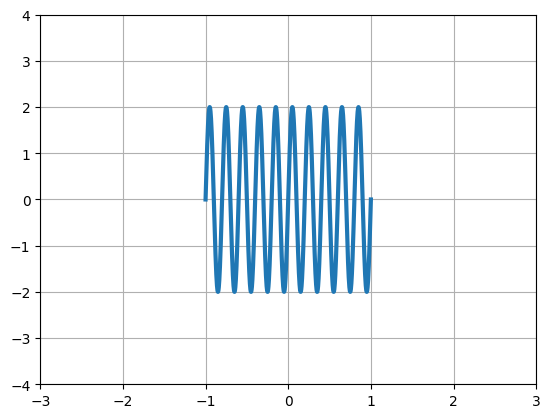

In [126]:
# @title sine moving
f = 5
A = 2
Fs = 200

fig = plt.figure()
axis = plt.axes(xlim = (-3,3),
                ylim = (-4,4))
axis.grid()

line, = axis.plot([], [], lw=3)


def init():
  line.set_data([], [])
  return line,

def animate(i):

  t = np.linspace(-1,1,1000) + 0.01*i
  #print(i)
  y = A * np.sin(2* np.pi* f* t)

  line.set_data(t,y)
  return line,

anim = FuncAnimation(fig, animate,
                    frames = Fs,
                    interval = 10,
                    repeat=False)

anim.save('/content/drive/MyDrive/Python animations/continuousSineWave2.mp4',
          writer = 'ffmpeg', fps = 30)

In [ ]:
t = np.linspace(2,3,1000) + 0.01*200
t

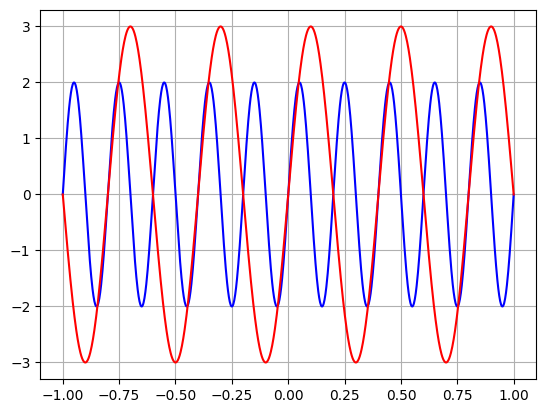

In [29]:
# @title 2 sine wave
f1 = 5
A1 = 2
f2 = 2.5
A2 = 3
Fs = 400

factor = 0.01

fig = plt.figure()
axis = plt.axes(xlim = (-1,1),
                ylim = (-4,4))

def animate(i):
  axis.cla()
  t = np.linspace(-1,1,1000)

  y1 = A1 * np.sin(2* np.pi* f1*(t- factor *i))
  y2 = A2 * np.sin(2* np.pi* f2*(t- factor *i))

  axis.plot(t,y1,'b', t,y2,'r')
  axis.grid()

anim = FuncAnimation(fig, animate,
                    frames = Fs,
                    interval = 20, )

anim.save('/content/drive/MyDrive/Python animations/2SineWave.mp4',
          writer = 'ffmpeg', fps = 30)

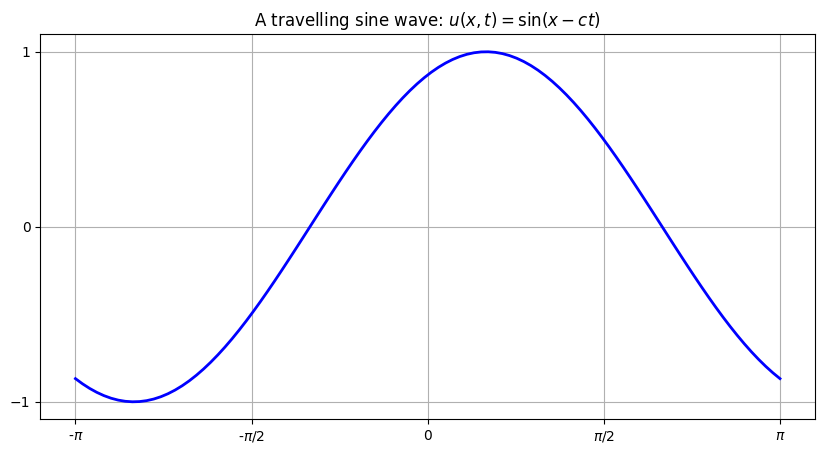

In [32]:
# @title travelling sine wave
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(10,5))
wave, = ax.plot(x,y, "-", color="b", lw=2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels((r"-$\pi$", r"-$\pi/2$", "0", r"$\pi/2$", r"$\pi$"))
ax.set_yticks((-1,0,1))
ax.grid(True)
ax.set_title(r"A travelling sine wave: $u(x,t) = \sin(x-ct)$")

# Transpose f(x) -> f(x - ct)
def shift(t, c ): # fargs changes the additional input parameters to this function
  new_y = f(x - c*t)
  wave.set_ydata(new_y)
  return(wave,)

anim = FuncAnimation(fig, shift, frames=200,
                          fargs = (-0.1,),
                          interval=20, blit=True)

anim.save('/content/drive/MyDrive/Python animations/movingSineWave.mp4',
          writer = 'ffmpeg', fps = 30)

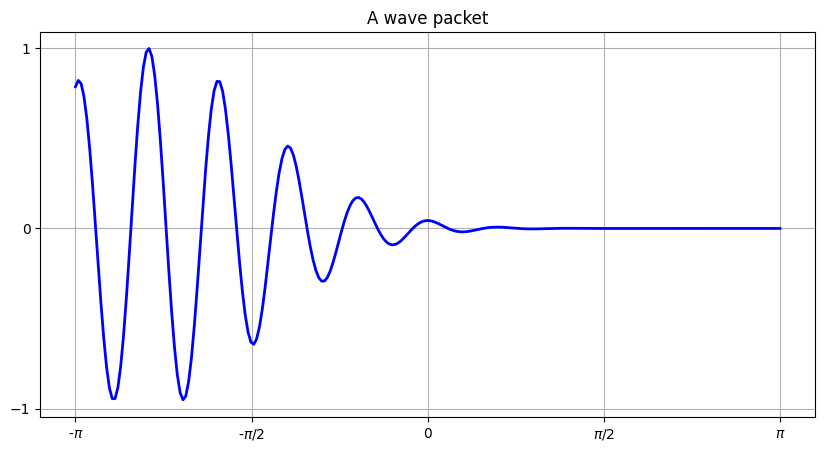

In [38]:
# @title wavepacket
f = lambda x: np.exp(-x**2 / 2) * np.cos(10*x)
x = np.linspace(-np.pi, np.pi, 250)
y = f(x)

fig, ax = plt.subplots(figsize=(10,5))
wavepacket, = ax.plot(x,y, "-", color="b", lw=2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels((r"-$\pi$", r"-$\pi/2$", "0", r"$\pi/2$", r"$\pi$"))
ax.set_yticks((-1,0,1))
ax.grid(True)
ax.set_title(r"A wave packet")

# Transpose f(x) -> f(x - ct)
def shift(t, c ): # fargs changes the additional input parameters to this function
  new_y = f(x - c*t)
  wavepacket.set_ydata(new_y)
  return(wavepacket,)

anim = FuncAnimation(fig, shift, frames=250,
                          fargs = (-0.01,),
                          interval=50, blit=True)

anim.save('/content/drive/MyDrive/Python animations/Wavepacket.mp4',
          writer = 'ffmpeg', fps = 30)

In [44]:
def y(x):
  pi = np.pi
  x = x % (2*pi)
  if (x < pi/2):
    h = x / (pi/2)
  elif (x >= pi/2) and (x < 3 * pi/2):
    h = 1 - (x-pi/2)/(pi/2)
  else:
    h = (x - 2*pi)/(pi/2)
  return h

f = np.vectorize(y)

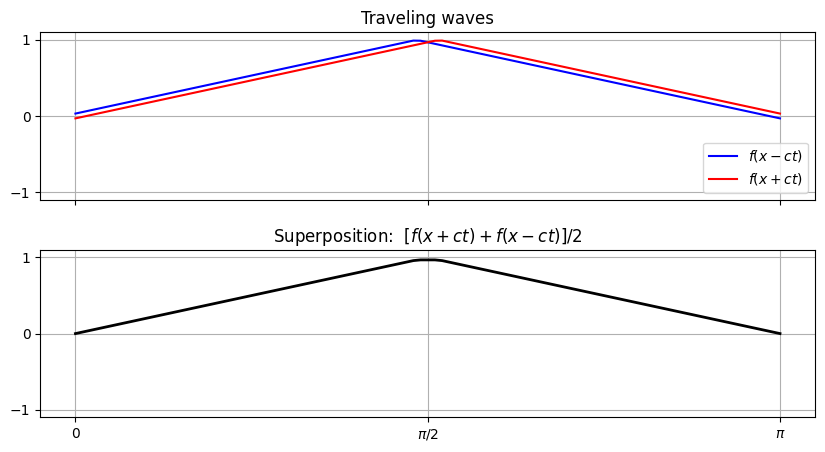

In [49]:
# @title Superposition
x = np.append(np.linspace(0, np.pi, 99), np.pi/2)
x.sort()
y = f(x)

# plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize=(10,5), nrows=2, sharex="all", sharey="all")
plt.subplots_adjust(hspace = 0.3)
rwave, = ax0.plot(x,y, "-", color="b", label = r"$f(x-ct)$")
lwave, = ax0.plot(x,y, "-", color="r", label = r"$f(x+ct)$")
string, = ax1.plot(x,y, "-", color = "k", lw=2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

def shift(t, c=1):
  # transpose each travelling wave
  new_r, new_l = f(x - c*t), f(x + c*t)
  new_y = (new_r + new_l)/2
  rwave.set_ydata(new_r)
  lwave.set_ydata(new_l)
  string.set_ydata(new_y)

  return lwave, rwave, string

anim = FuncAnimation(fig, shift, frames = 189, fargs = (0.1,),
                         interval = 30, blit = True)
anim.save('/content/drive/MyDrive/Python animations/travellingWaveSUPERPOSITION.mp4',
          writer = 'ffmpeg', fps = 30)

In [53]:
from scipy import interpolate

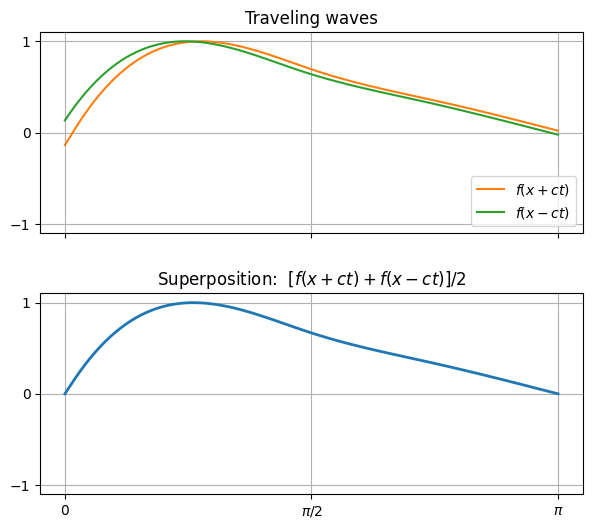

In [58]:
# @title superposition varying shapes
def y2(x):
  """Odd periodic extension of plucked string"""
  pi = np.pi
  # Use linear interpolation to generate initial shape
  x0, y0 = [0, pi/4, pi, 7*pi/4, 2*pi], [0,1,0,-1,0]
  u0 = interpolate.interp1d(x0, y0)
  # make periodic
  x = x % (2*pi)
  return u0(x) # choose x points from the generated(interpolated, u0) shape


f2 = np.vectorize(y2)


# Traveling wave solution to plucked string
# with asymmetric initial shape
def y3(x):
    """Odd periodic extension of plucked string"""
    pi = np.pi
    # Use cubic interpolation to generate smooth initial shape
    x0 = np.linspace(0, 2*pi, 9)
    y0 = f2(x0)
    u0 = interpolate.interp1d(x0, y0, kind = 3)
    x = x % (2 * pi)
    return(u0(x))

f3 = np.vectorize(y3) # To work on numpy arrays

#-------------choose shape smoothness order, f2 or f3 ----------------------
f = f3
# ----------------------------------------------------

# Generate initial shape
x = np.append(np.linspace(0, np.pi, 98), np.pi/4)
x.sort()
y = f(x)

# Plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize = (7, 6), nrows = 2,
                           sharex = "all", sharey = "all")
plt.subplots_adjust(hspace = 0.3)
lwave,  = ax0.plot(x, y, "-", color = "C1",
                   label = r"$f(x + ct)$")
rwave,  = ax0.plot(x, y, "-", color = "C2",
                   label = r"$f(x - ct)$")
string, = ax1.plot(x, y, "-", color = "C0", lw = 2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

# Compute traveling wave solution
def shift(t, c = 1):
    # Transpose each traveling wave
    new_l, new_r = f(x + c*t), f(x - c*t)
    new_y = (new_l + new_r)/2
    rwave.set_ydata(new_r)
    lwave.set_ydata(new_l)
    string.set_ydata(new_y)
    return(lwave, rwave, string)

# Animate
anim = FuncAnimation(fig, shift, frames = 189,
                         fargs = (0.1,),
                         interval = 30, blit = True)

anim.save('/content/drive/MyDrive/Python animations/varyingShapeSUPERPOSITION.mp4',
          writer = 'ffmpeg', fps = 30)

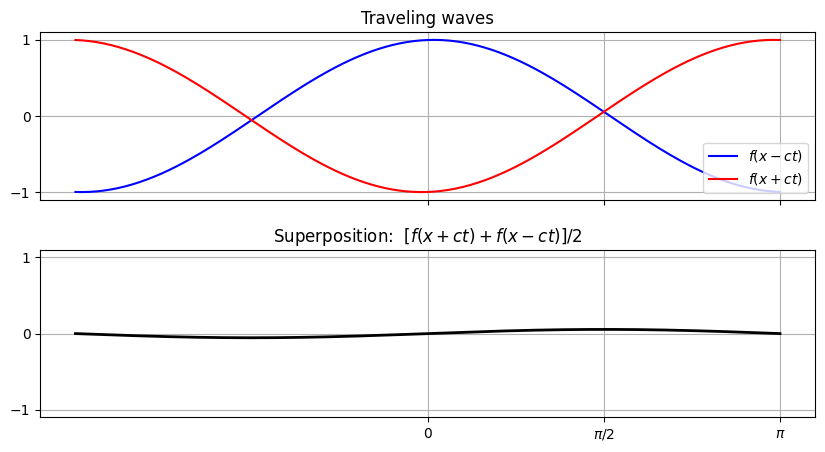

In [59]:
# @title superposition sine wave
x = np.append(np.linspace(-np.pi, np.pi, 199), np.pi/2)
x.sort()
f = lambda x: np.sin(x)
y = f(x)

# plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize=(10,5), nrows=2, sharex="all", sharey="all")
plt.subplots_adjust(hspace = 0.3)
rwave, = ax0.plot(x,y, "-", color="b", label = r"$f(x-ct)$")
lwave, = ax0.plot(x,y, "-", color="r", label = r"$f(x+ct)$")
string, = ax1.plot(x,y, "-", color = "k", lw=2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

def shift(t, c=1):
  # transpose each travelling wave
  new_r, new_l = f(x - c*t), f(x + c*t)
  new_y = (new_r + new_l)/2
  rwave.set_ydata(new_r)
  lwave.set_ydata(new_l)
  string.set_ydata(new_y)

  return lwave, rwave, string

anim = FuncAnimation(fig, shift, frames = 300, fargs = (0.1,),
                         interval = 30, blit = True)
anim.save('/content/drive/MyDrive/Python animations/superposition2.mp4',
          writer = 'ffmpeg', fps = 30)

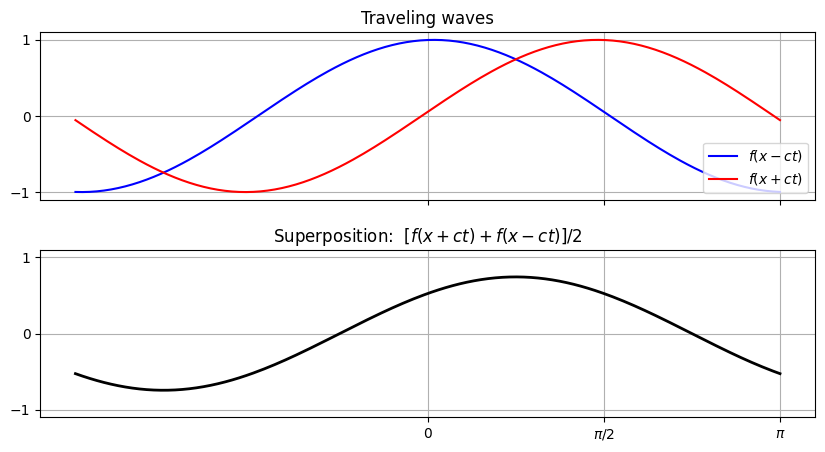

In [62]:
# @title superposition sine wave
x = np.append(np.linspace(-np.pi, np.pi, 199), np.pi/2)
x.sort()
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(x)
y1 = f1(x)
y2 = f2(x)
y = (y1+y2)/2

# plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize=(10,5), nrows=2, sharex="all", sharey="all")
plt.subplots_adjust(hspace = 0.3)
rwave, = ax0.plot(x,y1, "-", color="b", label = r"$f(x-ct)$")
lwave, = ax0.plot(x,y2, "-", color="r", label = r"$f(x+ct)$")
string, = ax1.plot(x,y, "-", color = "k", lw=2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

def shift(t, c=1):
  # transpose each travelling wave
  new_r, new_l = f1(x - c*t), f2(x + c*t)
  new_y = (new_r + new_l)/2
  rwave.set_ydata(new_r)
  lwave.set_ydata(new_l)
  string.set_ydata(new_y)

  return lwave, rwave, string

anim = FuncAnimation(fig, shift, frames = 300, fargs = (0.1,),
                         interval = 30, blit = True)
anim.save('/content/drive/MyDrive/Python animations/superposition2.mp4',
          writer = 'ffmpeg', fps = 30)

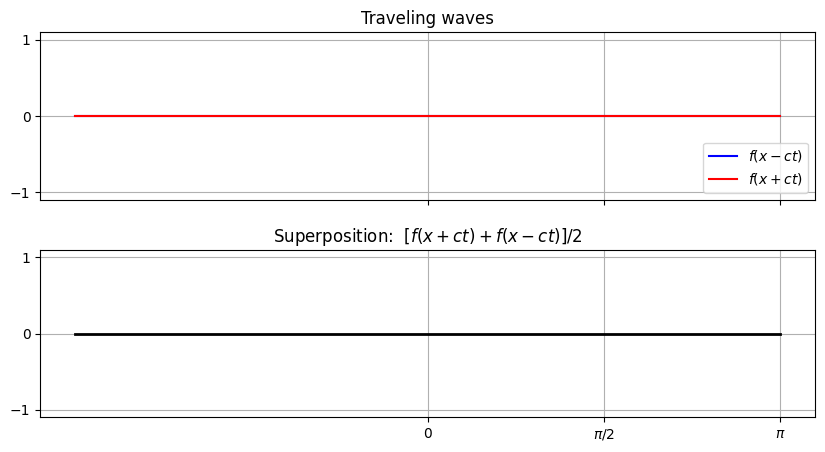

In [67]:
# @title superposition sine wave
x = np.append(np.linspace(-np.pi, np.pi, 199), np.pi/2)
x.sort()
f1 = lambda x: np.exp(-x**2 / 2) * np.cos(10*x)
f2 = lambda x: np.exp(-x**2 / 2) * np.cos(5*x) + np.exp(-x**2 / 2) * np.sin(5*x)
y1 = f1(x)
y2 = f2(x)
y = (y1+y2)/2

# plot initial shape
fig, (ax0, ax1) = plt.subplots(figsize=(10,5), nrows=2, sharex="all", sharey="all")
plt.subplots_adjust(hspace = 0.3)
rwave, = ax0.plot(x,y1, "-", color="b", label = r"$f(x-ct)$")
lwave, = ax0.plot(x,y2, "-", color="r", label = r"$f(x+ct)$")
string, = ax1.plot(x,y, "-", color = "k", lw=2)

ax0.set_title(r"Traveling waves")
ax0.legend(loc = "lower right")
ax1.set_title(r"Superposition:  $[f(x + ct) + f(x - ct)]/2$")
ax1.set_xticks([0, np.pi/2, np.pi])
ax1.set_xticklabels(("0", r"$\pi/2$", r"$\pi$"))
for ax in (ax0, ax1):
    ax.set_ylim([-1.1, 1.1])
    ax.set_yticks((-1, 0, 1))
    ax.grid(True)

def shift(t, c=1):
  # transpose each travelling wave
  new_r, new_l = f1(x - c*t), f2(x + c*t)
  new_y = (new_r + new_l)/2
  rwave.set_ydata(new_r)
  lwave.set_ydata(new_l)
  string.set_ydata(new_y)

  return lwave, rwave, string

anim = FuncAnimation(fig, shift, frames = 300, fargs = (0.1,),
                         interval = 30, blit = True)
anim.save('/content/drive/MyDrive/Python animations/superpositionPackets.mp4',
          writer = 'ffmpeg', fps = 30)